# Einleitung

Dieses Notebook soll zeigen wie einfach Machine Learning ist!

Wir werden versuchen den Verkaufspreis eines Autos vorherzusagen und auch überprüfen wie gut unsere Modelle dies für Testautos können!

# Verwendeter Datensatz

- Name: "Germany Cars Dataset"    
- URL: https://www.kaggle.com/datasets/ander289386/cars-germany
- Lizenz: Public Domain
- Größe: 510 KB
- Umfang: 9 Merkmale für 46405 Fahrzeuge

# Daten einlesen

In [1]:
import pandas
t = pandas.read_csv("autoscout24-germany-dataset.csv")

In [2]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


# Daten bereinigen

## Daten auf Vollständigkeit und Plausibilität überprüfen

In [3]:
t.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [4]:
pandas.options.display.float_format = '{:.5f}'.format
t.describe()

,mileage,price,hp,year
count,46405.00000,46405.00000,46376.00000,46405.00000
mean,71177.86411,16572.33723,132.99099,2016.01295
std,62625.30846,19304.69592,75.44928,3.15521
min,0.00000,1100.00000,1.00000,2011.00000
25%,19800.00000,7490.00000,86.00000,2013.00000
50%,60000.00000,10999.00000,116.00000,2016.00000
75%,105000.00000,19490.00000,150.00000,2019.00000
max,1111111.00000,1199900.00000,850.00000,2021.00000


## Selektieren aller Zeilen, in denen was fehlt

In [5]:
t[ t["hp"].isna() ]

,mileage,make,model,fuel,gear,offerType,price,hp,year
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
2368,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
5552,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
5760,129375,Peugeot,207,Gasoline,Manual,Used,5950,NaN,2013
8892,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
9264,5,Aixam,NaN,Electric,Automatic,Pre-registered,22180,NaN,2021
10575,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
10779,71113,Opel,Corsa,Gasoline,Manual,Used,5666,NaN,2012
10782,72109,Ford,Fiesta,Gasoline,Manual,Used,6222,NaN,2013
12000,139,Renault,Twingo,Electric,Automatic,Demonstration,15990,NaN,2021


In [6]:
t[t.isna().any(axis=1)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
243,93850,Renault,Grand Scenic,Diesel,NaN,Used,7990,110.00000,2012
347,52753,Lada,Vesta,Gasoline,NaN,Used,8000,106.00000,2017
365,3500,Others,NaN,Electric,Manual,Used,5500,38.00000,2018
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
612,46850,Suzuki,Alto,Gasoline,NaN,Used,3999,68.00000,2011
...,...,...,...,...,...,...,...,...,...
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.00000,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.00000,2021
46237,2000,Tesla,NaN,Electric,Automatic,Used,57020,487.00000,2021
46326,45,BMW,iX3,Electric,NaN,Used,58000,286.00000,2021


In [7]:
t = t.dropna()
t.shape

(46071, 9)

In [8]:
t.describe()

,mileage,price,hp,year
count,46071.00000,46071.00000,46071.00000,46071.00000
mean,71233.13664,16563.12125,132.99266,2016.01216
std,62454.13035,19279.60314,75.07469,3.15555
min,0.00000,1100.00000,1.00000,2011.00000
25%,19900.00000,7490.00000,86.00000,2013.00000
50%,60000.00000,11000.00000,116.00000,2016.00000
75%,105000.00000,19490.00000,150.00000,2019.00000
max,1111111.00000,1199900.00000,850.00000,2021.00000


## Filtern nach Extremwerten und Plausibilitätsprüfung

In [9]:
t.query("mileage>500000")

,mileage,make,model,fuel,gear,offerType,price,hp,year
4039,527205,Mercedes-Benz,C 220,Diesel,Automatic,Used,4899,170.00000,2012
4529,514614,Mercedes-Benz,E 200,Diesel,Automatic,Used,7200,136.00000,2015
12768,598744,Mercedes-Benz,Sprinter,Diesel,Manual,Used,13078,163.00000,2015
13955,599900,Ford,Transit,Diesel,Manual,Used,5990,116.00000,2012
16869,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73.00000,2019
25438,620000,Mercedes-Benz,Vito,Diesel,Manual,Used,6500,163.00000,2014
30529,550000,Iveco,Daily,Diesel,Manual,Used,8000,145.00000,2014
34744,699000,Mercedes-Benz,Sprinter,Diesel,Manual,Used,3990,163.00000,2011
38445,530003,Citroen,C3,Gasoline,Manual,Used,5500,68.00000,2015


In [10]:
t.query("price>500000")

,mileage,make,model,fuel,gear,offerType,price,hp,year
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.00000,2019
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.00000,2019
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.00000,2017


# Daten explorieren

In [11]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


## Histogramme

In [12]:
t["price"]

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

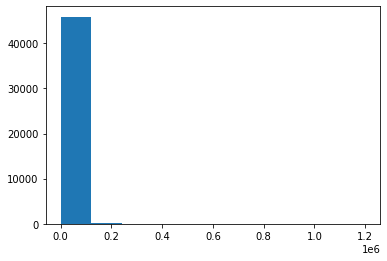

In [13]:
import matplotlib.pyplot as plt
plt.hist(t["price"])
plt.show()

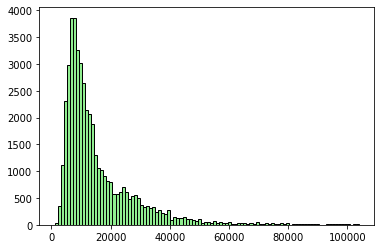

In [14]:
import matplotlib.pyplot as plt
plt.hist(t.query("price<105000")["price"], bins=100, edgecolor="black", color="lightgreen")
plt.show()

## Kategoriale Spalten

In [15]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


In [16]:
t["make"].unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Lexus',
       'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa', 'Subaru', 'Dodge',
       'Microcar', 'Lamborghini', 'Lada', 'Tesla', 'Chrysler', 'McLaren',
       'Aston', 'Rolls-Royce', 'Lancia', 'Abarth', 'DS', 'Daihatsu',
       'Ligier', 'Ferrari', 'Aixam', 'Zhidou', 'Morgan', 'Maybach', 'RAM',
       'Alpina', 'Polestar', 'Brilliance', 'Piaggio', 'FISKER', 'Others',
       'Cadillac', 'Iveco', 'Isuzu', 'Corvette', 'Baic', 'DFSK',
       'Estrima', 'Alpine'], dtype=object)

In [17]:
t["make"].nunique()

71

In [18]:
t["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [19]:
t["fuel"].value_counts()

Gasoline             28720
Diesel               15178
Electric/Gasoline     1146
Electric               661
LPG                    125
CNG                    116
Electric/Diesel         53
Others                  47
-/- (Fuel)              22
Ethanol                  2
Hydrogen                 1
Name: fuel, dtype: int64

## Erste Hypothesen testen

In [20]:
t["price"]

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

In [21]:
t["hp"]

0       116.00000
1       122.00000
2       160.00000
3       110.00000
4       156.00000
           ...   
46400    71.00000
46401    71.00000
46402    71.00000
46403    71.00000
46404    71.00000
Name: hp, Length: 46071, dtype: float64

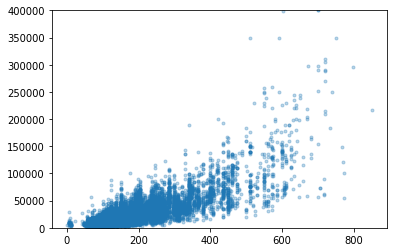

In [22]:
plt.scatter( t["hp"], t["price"], marker=".", alpha=0.3 )
plt.ylim(0,400000)
plt.show()

## Korrelationsmatrix

In [23]:
t.corr()

,mileage,price,hp,year
mileage,1.00000,-0.30355,-0.01490,-0.67805
price,-0.30355,1.00000,0.74672,0.40570
hp,-0.01490,0.74672,1.00000,0.16690
year,-0.67805,0.40570,0.16690,1.00000


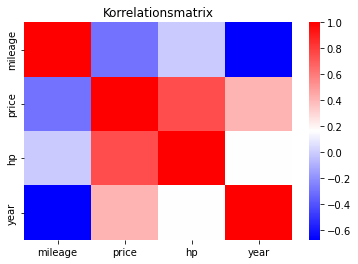

In [24]:
import seaborn as sns
M = t.corr()
sns.heatmap(M,
            cmap="bwr",
            xticklabels=M.columns.values,
            yticklabels=M.columns.values)
plt.title("Korrelationsmatrix")
plt.show()

Zur Auswahl von Colormaps:

https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

# Daten fürs ML aufbereiten

In [25]:
t

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00000,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00000,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00000,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00000,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00000,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.00000,2021


## Aufspaltung in Input- und Outputdaten

In [26]:
# versuche es mit 1,2 oder 3 numerischen Merkmalen
#x = t[ ["mileage"] ]
#x = t[ ["mileage", "year"] ]
x = t[ ["mileage", "year", "hp"] ]
y = t["price"]

In [27]:
x

,mileage,year,hp
0,235000,2011,116.00000
1,92800,2011,122.00000
2,149300,2011,160.00000
3,96200,2011,110.00000
4,156000,2011,156.00000
...,...,...,...
46400,99,2021,71.00000
46401,99,2021,71.00000
46402,99,2021,71.00000
46403,99,2021,71.00000


In [28]:
y

0         6800
1         6877
2         6900
3         6950
4         6950
         ...  
46400    12990
46401    12990
46402    12990
46403    12990
46404    12990
Name: price, Length: 46071, dtype: int64

## Aufspaltung in Trainings- und Testdaten

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [30]:
x_train.shape

(36856, 3)

In [31]:
y_train.shape

(36856,)

In [32]:
x_test.shape

(9215, 3)

In [33]:
y_test.shape

(9215,)

In [34]:
x_train

,mileage,year,hp
26009,93000,2011,60.00000
4718,49100,2014,95.00000
2533,113000,2012,174.00000
41360,46004,2017,184.00000
22549,42961,2017,116.00000
...,...,...,...
21369,68000,2012,122.00000
46222,9900,2021,245.00000
42900,88500,2018,150.00000
43867,10691,2019,190.00000


# Machine Learning mittels `scikit-learn`

## Modell erlernen

In [35]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)

#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()

model.fit(x_train, y_train)

KNeighborsRegressor()

## Modell testen

In [36]:
pred = model.predict(x_test)

In [37]:
pred[:20]

array([ 7126.8, 16347. , 19223. , 23122. , 26152. , 10634. , 15867.8,
        9897.8, 10548.8, 14154. ,  7709.6, 53362. ,  4840. , 53804. ,
        7288.4,  6680. ,  5912. ,  6248.8,  4865.8, 14198. ])

In [38]:
y_test[:20]

11100    10590
3364      7900
23166    18450
18826    26650
41493    17860
32970    12110
22565    15950
41458    11990
11858    12900
31233    12490
28983     6800
44623    48900
29840     3999
31312    41990
24599     6350
38161     6800
28168     5000
12266     5950
35053     4999
15746    10999
Name: price, dtype: int64

In [39]:
import numpy
mittlerer_fehler = numpy.mean(abs(pred - y_test))
mittlerer_fehler

4223.907650569723

# Alle Daten fürs ML verwenden

## Numerische Kodierung kategorialer Spalten

In [40]:
d = {"Name" : ["Bart", "Lisa", "Homer"],
     "Lieblingsfarbe" : ["Rot", "Grün", "Blau"]}
d

{'Name': ['Bart', 'Lisa', 'Homer'], 'Lieblingsfarbe': ['Rot', 'Grün', 'Blau']}

In [41]:
t2 = pandas.DataFrame(d)
t2

,Name,Lieblingsfarbe
0,Bart,Rot
1,Lisa,Grün
2,Homer,Blau


In [42]:
pandas.get_dummies(t2)

,Name_Bart,Name_Homer,Name_Lisa,Lieblingsfarbe_Blau,Lieblingsfarbe_Grün,Lieblingsfarbe_Rot
0,1,0,0,0,0,1
1,0,0,1,0,1,0
2,0,1,0,1,0,0


In [43]:
t2 = pandas.get_dummies(t)
t2

,mileage,price,hp,year,make_Abarth,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,6800,116.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,92800,6877,122.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,6900,160.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,6950,110.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,6950,156.00000,2011,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46401,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46402,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46403,99,12990,71.00000,2021,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Aufspaltung in Input- und Outputdaten

In [44]:
x = t2.drop("price", axis=1)
y = t2["price"]

## Aufspaltung in Trainings- und Testdaten

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [46]:
x_train.shape

(36856, 928)

In [47]:
y_train.shape

(36856,)

In [48]:
x_test.shape

(9215, 928)

In [49]:
y_test.shape

(9215,)

## Machine Learning

In [50]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

## Modellgüte bestimmen

In [51]:
pred = model.predict(x_test)

In [52]:
pred[:20]

array([10990.        ,  8490.        , 19990.        , 23990.        ,
       18990.        , 11680.        , 16480.        ,  9190.        ,
       13830.        , 12990.        ,  8375.        , 45890.        ,
        4490.        , 40499.        ,  6990.        ,  4990.        ,
        5499.66666667,  5240.        ,  5400.        , 10790.        ])

In [53]:
y_test[:20]

11100    10590
3364      7900
23166    18450
18826    26650
41493    17860
32970    12110
22565    15950
41458    11990
11858    12900
31233    12490
28983     6800
44623    48900
29840     3999
31312    41990
24599     6350
38161     6800
28168     5000
12266     5950
35053     4999
15746    10999
Name: price, dtype: int64

In [54]:
import numpy
mittlerer_fehler = numpy.mean(abs(pred - y_test))
mittlerer_fehler

2376.358236351443

# Machine Learning mittels `TensorFlow`

## Einführung Skalierung

In [55]:
d = {"A": [-20, -20, 0, 20], "B": [-5, 0, 5, 5]}
d

{'A': [-20, -20, 0, 20], 'B': [-5, 0, 5, 5]}

In [56]:
t2 = pandas.DataFrame(d)
t2

,A,B
0,-20,-5
1,-20,0
2,0,5
3,20,5


In [57]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()

In [58]:
s.fit_transform(t2)

array([[0. , 0. ],
       [0. , 0.5],
       [0.5, 1. ],
       [1. , 1. ]])

## Beispieldaten skalieren

In [59]:
x = t[ ["mileage", "year", "hp"] ]
y = t["price"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [60]:
s_input = MinMaxScaler()
s_output = MinMaxScaler()

In [61]:
x_train_scaled = s_input.fit_transform( x_train )
x_test_scaled = s_input.transform( x_test )

In [62]:
y_train_scaled = s_output.fit_transform( y_train.values.reshape(-1,1) )
y_test_scaled = s_output.transform( y_test.values.reshape(-1,1) )

In [63]:
x_train_scaled[:5]

array([[0.08370001, 0.        , 0.06508876],
       [0.04419   , 0.3       , 0.10650888],
       [0.10170001, 0.1       , 0.2       ],
       [0.0414036 , 0.6       , 0.21183432],
       [0.0386649 , 0.6       , 0.13136095]])

In [64]:
y_train_scaled[:5]

array([[0.00141826],
       [0.00646561],
       [0.00663246],
       [0.02456931],
       [0.01129688]])

## Neuronales Netz erstellen und trainieren

In [65]:
import tensorflow as tf
tf.__version__

2022-05-29 12:13:05.397512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-29 12:13:05.397528: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

In [66]:
nr_inputs = x_train.shape[1]
nr_inputs

3

In [67]:
nr_outputs = 1
nr_outputs

1

In [96]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(20,
                             activation="relu",
                             input_shape=(nr_inputs,),
                             name="HiddenLayer1"))
model.add(keras.layers.Dense(10,
                             activation="relu",                             
                             name="HiddenLayer2"))
model.add(keras.layers.Dense(nr_outputs,                             
                             activation="linear",
                             name="OutputLayer"))


model.compile(optimizer='sgd',
              loss=keras.losses.MeanAbsoluteError())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 20)                80        
                                                                 
 HiddenLayer2 (Dense)        (None, 10)                210       
                                                                 
 OutputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(x_train_scaled,
                    y_train_scaled,
                    validation_split=0.1,
                    epochs=20)

Epoch 1/20
1037/1037 [==============================] - 1s 984us/step - loss: 0.0053 - val_loss: 0.0033
Epoch 2/20
1037/1037 [==============================] - 1s 778us/step - loss: 0.0052 - val_loss: 0.0049
Epoch 3/20
1037/1037 [==============================] - 1s 750us/step - loss: 0.0052 - val_loss: 0.0062
Epoch 4/20
1037/1037 [==============================] - 1s 823us/step - loss: 0.0052 - val_loss: 0.0036
Epoch 5/20
1037/1037 [==============================] - 1s 910us/step - loss: 0.0052 - val_loss: 0.0031
Epoch 6/20
1037/1037 [==============================] - 1s 859us/step - loss: 0.0052 - val_loss: 0.0035
Epoch 7/20
1037/1037 [==============================] - 1s 884us/step - loss: 0.0053 - val_loss: 0.0042
Epoch 8/20
1037/1037 [==============================] - 1s 803us/step - loss: 0.0053 - val_loss: 0.0065
Epoch 9/20
1037/1037 [==============================] - 1s 838us/step - loss: 0.0052 - val_loss: 0.0033
Epoch 10/20
1037/1037 [==============================] - 1s 862u

In [107]:
history.history["loss"][:10]

[0.005258442834019661,
 0.0052226330153644085,
 0.005244121421128511,
 0.005224570166319609,
 0.005185762420296669,
 0.0052157798781991005,
 0.005296964664012194,
 0.005269938614219427,
 0.005240429192781448,
 0.005232592113316059]

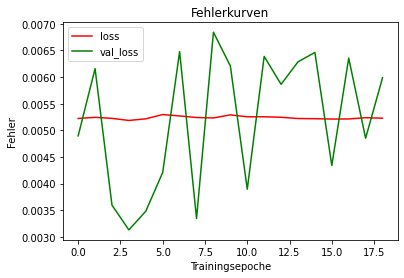

In [108]:
import matplotlib.pyplot as plt
y1 = history.history["loss"][1:]
y2 = history.history["val_loss"][1:]
plt.plot(y1, color="red", label="loss")
plt.plot(y2, color="green", label="val_loss")
plt.xlabel("Trainingsepoche")
plt.ylabel("Fehler")
plt.title("Fehlerkurven")
plt.legend()
plt.show()

In [109]:
preds_scaled = model.predict( x_test_scaled )

In [110]:
preds_scaled[:10]

array([[0.00348716],
       [0.00085869],
       [0.01001634],
       [0.01517343],
       [0.01466107],
       [0.00618043],
       [0.00633155],
       [0.0031203 ],
       [0.00254915],
       [0.00846209]], dtype=float32)

In [111]:
preds_euro = s_output.inverse_transform( preds_scaled )

In [112]:
preds_euro[:10]

array([[ 5429.887 ],
       [ 2279.265 ],
       [13256.083 ],
       [19437.629 ],
       [18823.488 ],
       [ 8658.17  ],
       [ 8839.317 ],
       [ 4990.1484],
       [ 4305.533 ],
       [11393.082 ]], dtype=float32)

In [113]:
y_test.values[:20]

array([10590,  7900, 18450, 26650, 17860, 12110, 15950, 11990, 12900,
       12490,  6800, 48900,  3999, 41990,  6350,  6800,  5000,  5950,
        4999, 10999])

In [114]:
mittlerer_fehler = numpy.mean(abs(preds_euro - y_test.values))
mittlerer_fehler

14481.161319134097